## 逻辑回归
与线性回归不太一样，这里我们定义代价函数，与其对应的梯度下降方法，然后使用库来最小化代价函数
首先编写出读取数据的方法

### 二维逻辑回归，没有特征映射
也就是说方程被设置成了 theta * x = heta0 + theta1 * x1 + theta2 * x2
因为观察散点图可以知道，决策边界基本上是一条直线，所以方程可以设置的比较简单

In [17]:
import pandas
import numpy
import matplotlib.pyplot as plt

这里取70%作为训练集，剩下30%做测试(先不这样，我看他答案也没取)

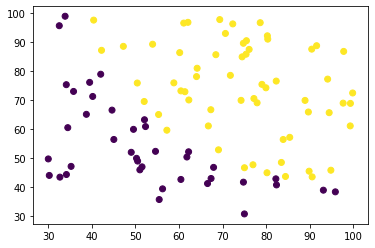

In [3]:
def getData(url):
    data=numpy.array(pandas.read_csv(url))
    column=data.shape[1]
    x=data[:,0:column-1]
    x=numpy.insert(x,0,numpy.ones((data.shape[0])),axis=1)
    y=data[:,column-1]
    theta=numpy.zeros(data.shape[1])
    return x,y,theta

x,y,theta=getData('ex2data1.txt')
plt.scatter(x[:,1],x[:,2],c=y)
plt.show()

然后定义主函数sigmoid函数,公式如下
 $$
 sigmoid=\frac{1}{1+e^{-z}}
 $$

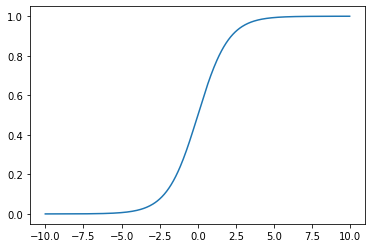

In [4]:
def sigmoid(z):#z就是x@theta
    return 1/(1+numpy.exp(-z))
plt.plot(numpy.arange(-10,10,step=0.05),sigmoid(numpy.arange(-10,10,step=0.05)))
plt.show()

然后就是代价函数了，公式如下
$$\begin{align}
  & J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
\end{align}$$


In [5]:
def costFunction(theta,x,y,):
    #实际上就是矩阵求和的过程
    #不知道为啥，theta初始化为1的时候就会超范围变成nan
    return (-y @ numpy.log(sigmoid(x @ theta))-(1-y) @ numpy.log(1-sigmoid(x @ theta)))/x.shape[0]

然后就是计算出他梯度下降的公式，通过一连串复杂的求导，我没算过，以后有时间算算

$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [6]:
def gradientDescent(theta,x,y):
    return ((sigmoid(x @ theta)-y) @ x)/x.shape[0]

答案上是通过一个库来自动梯度下降，不知道为啥要那样，我先自己下降看看

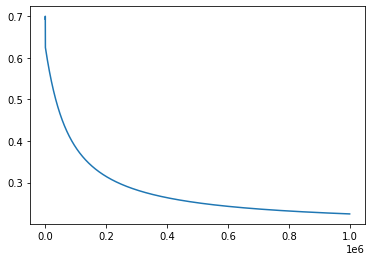

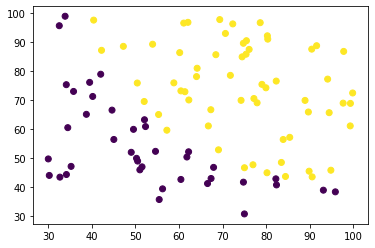

(array([-15.36016413,   0.12721608,   0.12328648]),
 array([0.00224781, 0.14040361, 0.9496315 , 0.9817113 , 0.06405594,
        0.98677249, 0.48092691, 0.99393176, 0.67877052, 0.82457079,
        0.1146345 , 0.98943731, 0.9959763 , 0.27769167, 0.92441351,
        0.48222148, 0.27659913, 0.99385392, 0.57401425, 0.18124155,
        0.98463738, 0.05175631, 0.00384395, 0.95505773, 0.76605165,
        0.59078644, 0.78058552, 0.21442282, 0.08219448, 0.80604241,
        0.92679052, 0.27920499, 0.45536448, 0.18734376, 0.12212771,
        0.75835789, 0.94153323, 0.3273207 , 0.14986483, 0.90513168,
        0.04627745, 0.99132255, 0.53149519, 0.03854025, 0.26385593,
        0.95877355, 0.9995781 , 0.98864655, 0.99927123, 0.98117218,
        0.99174997, 0.81881043, 0.02869164, 0.05611047, 0.15731988,
        0.99613389, 0.63880658, 0.93666509, 0.96910457, 0.99187306,
        0.00621714, 0.03346022, 0.00439862, 0.18463641, 0.13866199,
        0.85953784, 0.06175441, 0.9979935 , 0.65712454, 0.002848

In [24]:
def main01():
    x,y,theta=getData('ex2data1.txt')
    costs=[]
    for i in range(1000000):#自己梯度下降
        costs.append(costFunction(theta,x,y))
        theta=theta-0.00101*gradientDescent(theta,x,y)

    #绘制代价函数下降
    plt.plot(costs)
    plt.show()

    #绘制散点图与其对应的边界
    plt.scatter(x[:,1],x[:,2],c=y)
    #绘制决策边界其实就是主成分分析，把高维边低维，平面图变成一条直线
    # thetaLine=theta/theta[2]
    # plt.plot(numpy.arange(30,100,step=0.1),thetaLine[0]-thetaLine[1]*numpy.arange(30,100,step=0.1))

    ans=sigmoid(x@theta.T)
    plt.show()
    return theta,ans

main01()

# 会发现自己梯度下降的时候，下降的比较慢，而且还不一定能达到最优
# 以上梯度下降了40s，结果是[-15,0.12,0.12]
# 把决策边界画出来后，好像还可以的样子


然后使用现成的库来帮我们进行下降

In [8]:
import scipy.optimize as opt

def main02():
    x,y,theta=getData('ex2data1.txt')
    res = opt.minimize(fun=costFunction, x0=theta, args=(x, y), method='Newton-CG', jac=gradientDescent)
    print(res)

#main02()#好家伙，用的库梯度下降才用了0.1s

## 二维映射到高维的逻辑回归+正则化
首先可以把散点图画出来，可以知道，与数据一的不太一样  
会发现数据一的决策边界是一条直线，而决策二的显然比较复杂  
肯定不是线性的，所以数据二的维数会更高  
这时候我们就需要设计一个函数，可以生成二维n次方程  
n可以取得比较大，然后通过正则化来防止过拟合  
这个函数做得就是特征映射

获取已经特征映射的数据，dimension来设置映射的维度

In [9]:
#后面绘制决策边界的时候要把生成的点也映射成高维
#只好把映射独立出来
def mapping(data,dimension):
    x=numpy.ones((data.shape[0],1))
    index=1
    for i in range(dimension):
        for j in range(i+2):
            x=numpy.insert(x,index,numpy.power(data[:,0],j)*numpy.power(data[:,1],i+1-j),axis=1)
            index=index+1
    return x

In [10]:
def getMappingData(url,dimension):
    data=numpy.array(pandas.read_csv(url))
    y=data[:,2]

    # x=numpy.ones((data.shape[0],1))
    # index=1
    # for i in range(dimension):
    #     for j in range(i+2):
    #         x=numpy.insert(x,index,numpy.power(data[:,0],j)*numpy.power(data[:,1],i+1-j),axis=1)
    #         index=index+1

    x=mapping(data,dimension)

    theta=numpy.zeros(x.shape[1])
    return x,y,theta

同样的，需要signal函数、代价函数与梯度下降的函数  
signal函数是一样的，代价函数增加了正规方程，梯度下降也是加了一个小后缀  
代价函数公式如下
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$
梯度下降公式如下(梯度下降有点问题，第一部分还要乘一个x)
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\left( \frac{1}{m}\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}\left( {{x}^{\left( i \right)}} \right)-{{y}^{\left( i \right)}} \right)} \right)+\frac{\lambda }{m}{{\theta }_{j}}\text{ }\text{             for  j}\ge \text{1}$$

In [11]:
#正则化的代价函数
def regularized_cost(theta,x,y,Lambda=0.01):
    #前面都是一样的，直接用前面的cost
    regularized=(Lambda/(2*x.shape[0]))*(numpy.matmul(theta,theta))

    return costFunction(theta,x,y)+regularized

#正则化的梯度下降
def regularized_gradientDescent(theta,x,y,Lambda=0.01):
    #前面的小后缀
    houzhui=(Lambda/x.shape[0])*theta
    return gradientDescent(theta,x,y)+houzhui

基于上面手动的梯度下降，虽然下降了，但是不知道效果怎么样  
需要画出决策边界或者把样本带入看看正确率  
决策边界的绘制其实就是找概率为0.5的点，当sigmoid函数为0.5的时候，Z等于0  
也就是theta*x等于0

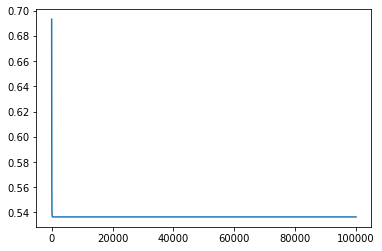

[ 1.12803611  1.13684439  0.59422141 -1.28753719 -0.91941802 -1.84353168
 -0.17827328 -0.34925127 -0.34584401  0.12991802 -1.1585754  -0.27179685
 -0.59331668 -0.04470922 -1.42023516 -0.45631939 -0.28964163 -0.27007993
 -0.04168572 -0.20038148 -0.24330097 -0.91489814 -0.139819   -0.32212886
  0.01883626 -0.2895572   0.0311821  -1.03759578]


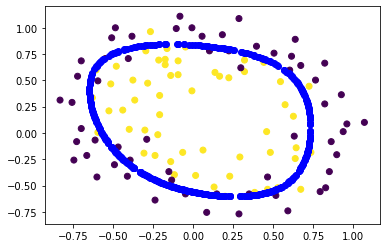

In [12]:
#可以，自己手动下降一遍，与库的下降对比一下
def main03(dimension,Lambda):
    x,y,theta=getMappingData('ex2data2.txt',dimension)
    cost=[]
    for i in range(100000):
        cost.append(regularized_cost(theta,x,y,Lambda))
        theta=theta-regularized_gradientDescent(theta,x,y,Lambda)
    #看看代价下降了没
    plt.plot(cost)
    plt.show()

    print(theta)
    #绘制样本散点图与决策边界
    #需要原来的x和y
    x,y,_=getData('ex2data2.txt')
    plt.scatter(x[:,1],x[:,2],c=y)

    #观察散点图可以看到，决策边界在-1到1里面
    #生成均匀的坐标，找约等于0的点
    x=numpy.linspace(-1,1,num=1000)
    data=[]
    #data=numpy.vstack((x,y)).T
    for i in range(len(x)):
        for j in range(len(x)):
            data.append([x[i],x[j]])
    data=numpy.array(data)
    x=mapping(data,dimension)
    
    x=data[numpy.abs(x@theta)<0.001,:]
    plt.scatter(x[:,0],x[:,1],c='#0000FF')
    plt.show()
    
main03(6,1)#可以的，默认lambda为1的时候，花了10s，实际下降的时间只有5s
#效果还不错

然后用库中优化后的下降来看看时间和下降的怎么样  
基本和手动梯度下降的一样，就是时间上会快一些

## 改变Lambda的值，观察决策边界的变化
随着Lambda的变大，拟合精度会变低  
随着Lambda的变小，拟合精度越来越高，然后就过拟合了

     fun: 0.3349573028338394
     jac: array([ 7.61779291e-06,  1.15577090e-05, -1.15783688e-05,  1.18860639e-05,
       -2.48904468e-05,  2.87542180e-05,  7.08733121e-06, -7.73374183e-06,
       -3.30200288e-06, -5.45345748e-06,  1.14650938e-05, -6.93069095e-06,
        2.93166748e-06, -5.15694383e-06,  1.58327862e-05,  8.72155805e-06,
       -5.48289064e-06,  9.42879787e-07, -1.47104643e-07, -1.22376116e-07,
       -8.19110225e-07,  8.54757726e-06, -1.73538624e-06,  1.52903581e-06,
       -1.43727470e-06,  2.15873838e-06, -1.84246267e-06,  1.29184746e-05])
 message: "Warning: CG iterations didn't converge. The Hessian is not positive definite."
    nfev: 9
    nhev: 0
     nit: 8
    njev: 1304
  status: 3
 success: False
       x: array([ 3.71838555,  4.52909821,  1.98590592, -6.00402122, -6.7003984 ,
       -5.3203576 , -2.49692985,  2.45151395,  0.11006971,  2.20462159,
       -6.26282838, -1.93398668, -3.67757731,  2.99153142, -3.92893713,
        2.91799487, -4.26294349, -3.5680

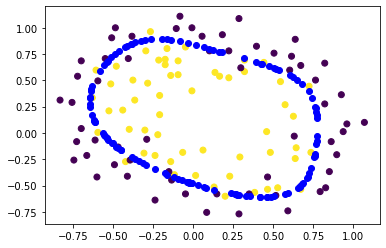

In [13]:
import scipy.optimize as opt
def main04():
    x,y,theta=getMappingData('ex2data2.txt',6)
    res=opt.minimize(fun=regularized_cost,x0=theta,args=(x,y),method='Newton-CG',jac=regularized_gradientDescent)
    print(res)
    theta=res.x

    #绘制决策边界
    x,y,_=getData('ex2data2.txt')
    plt.scatter(x[:,1],x[:,2],c=y)

    #观察散点图可以看到，决策边界在-1到1里面
    #生成均匀的坐标，找约等于0的点
    x=numpy.linspace(-1,1,num=1000)
    data=[]
    #data=numpy.vstack((x,y)).T
    for i in range(len(x)):
        for j in range(len(x)):
            data.append([x[i],x[j]])
    data=numpy.array(data)
    x=mapping(data,6)
    
    x=data[numpy.abs(x@theta)<0.001,:]
    plt.scatter(x[:,0],x[:,1],c='#0000FF')
    plt.show()
main04()